# Decision Trees

CART (Classification and Regression Tree)

## What are Decision Trees?

 - Supervised Learning
 - Works for both classification and regression
 - Foundation of Random Forests
 - Attractive because of interpretability
 
***

Decision Trees work by:
 - Split based on set impurity criteria
 - Stopping criteria
 
***

Some **advantages** of decision trees are:
 - Simple to understand and to interpret. Trees can be visualized.
 - Requires little data preperation.
 - Able to handle both numerical and categorical data.
 - Possible to validate a model using statistical tests.
 - Performs well even if its assumptions are somewhat violated by the true model from which the data were generalized.

The **disadvantages** of decision trees include:
 - Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples a required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem
 - Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
 - Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner.
 - Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting.

## Classification



### Training a Decision Tree with Scikit-Learn Library

In [4]:
from sklearn import tree

In [5]:
X = [[0, 0], [1, 2]]
y = [0, 1]

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
clf = clf.fit(X, y)

In [9]:
clf.predict([[2., 2.]])

array([1])

In [10]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

This means, there is 0% probability it will fit in first class and 100% probability it will fit in second class

In [11]:
clf.predict([[0.4, 1.2]])

array([1])

In [12]:
clf.predict_proba([[0.4, 1.2]])

array([[0., 1.]])

DecisionTreeClassifier is capable of both binary classification and multiclass classification

### Applying to Iris Dataset

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [18]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X = iris.data[:, 2:] #petal length and width

In [22]:
y = iris.target

In [23]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [24]:
clf = clf.fit(X, y)

## Visualizing Decision Trees

#### Export using GraphViz

In [74]:
from sklearn.tree import export_graphviz

In [75]:
export_graphviz(clf,
               out_file="tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

Run the following line on your command prompt

'$ dot -Tpng tree.dot -o tree.png'

Only works if you created an anaconda environment for data, else you can add GraphViz's executable to Path using:

import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Where you use the location of the bin folder for GraphViz

Then view tree with img src="tree.png" wrapped in <> and can scale with width=xx% and height=xx%

<img src="tree.png" width=75% height=75%>

#### GraphViz without export

In [80]:
import graphviz

In [82]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [83]:
graph = graphviz.Source(dot_data)

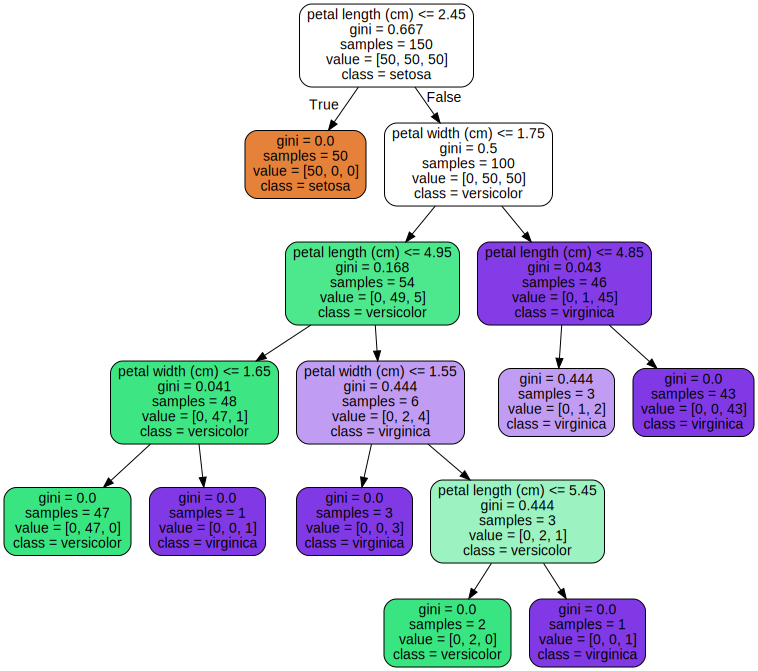

In [84]:
graph

### Visualize with Decision Boundary

In [85]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [93]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [99]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

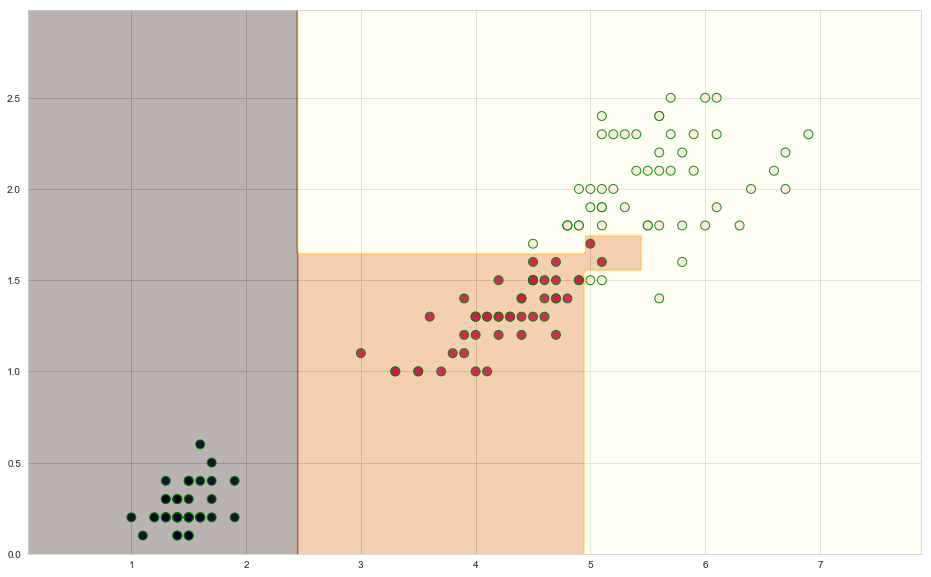

In [101]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.9, edgecolors='g');

***

## Decision Tree Learning

 - ID3 (Iterative Dichotomizer 3)
 - C4.5 (successor of ID3)
 - CART (Classification and Regression Tree)
 - CHAID (Chi-squared Automatic Interaction Detector)

### Tree algorithms
 - **ID3** algorithm creates a multiway tree, finding for each node (in a greedy manner) the categorical feature that will yield the largest information fain for categorical targets. Threes are grown to their maximum size and then a pruning step is usually applied to imporve the ability of the tree to generalize to unseen data
 
 
 - **C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (the output of the ID3 algorithm) into sets of if-then rules. The accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing the rule's precondition if the accuracy of the rule improves without it.
 
 
 - **C5.0** is the latest release. Uses less memory and builds smaller rulesets than C4.5 while being more accurate.
 
 
 - **CART** is similar to C4.5, but it differs in that is supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yields the largest information gain at each node.
 
 
 - **CHAID** performs multi-level splits when computing classification trees. Non-parametric. Does not require the data to be normally distributed.
 


Scikit-learn uses an optimized version of the CART algorithm

### Gini Impurity

scikit-learn default

a measure of purity / variability of categorical data

Difference between Gini Impurity and Gini Coefficient:
 - **Gini Impurity** is the measure of misclassification, which applies in multiclass classifier context
 - **Gini Coefficient** applies to binary classification and requires a classifier that can in some way rank examples according to the likelihood of being in a positive class
 - Both could be applied in some cases, but they are different measures. Impurity is what is commonly used in decision trees.
 

Key Points:
 - A pure node (homogeneous contents or samples with the same class) will have a Gini Coefficient of zero.
 - As the variation increases (heterogeneous classes or increase diversity), Gini coefficient increases and approaches 1.
 
 $$Gini=1-\sum_j^rp_j^2$$
 
 $p$ is the probability (often based on frequency table)

### Entropy

The entropy can explicitly be written as

$$H(X)=\sum_{i=1}^nP(x_i)I(x_i)=-\sum_{i=1}^nP(x_i)\log_bP(x_i)$$

where $b$ is the base of the logarithm used. Common values of b are 2, Euler's number $e$, and 10.

### Which should I use?

 - They tend to generale similar trees
 - Gini tends to be faster to compute

### Information Gain

 - Expected reduction in entropy caused by splitting
 - Keep splitting until you obtain a as close to homogeneous class as possible

## Regression

In [102]:
from sklearn import tree

In [104]:
X = [[0, 0], [3, 3]]
y = [0.75, 3]

In [105]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [106]:
tree_reg = tree_reg.fit(X, y)

In [108]:
tree_reg.predict([[1.5, 1.5]])

array([0.75])

**Decision Tree visualization example**

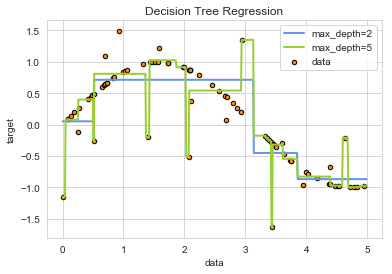

In [116]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

As you can see, max depth of 5 is extremely overfit.

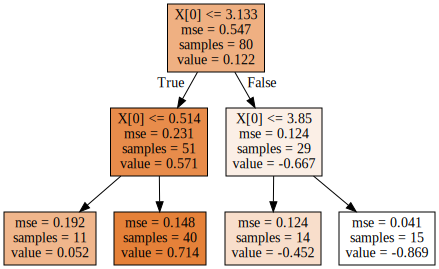

In [120]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

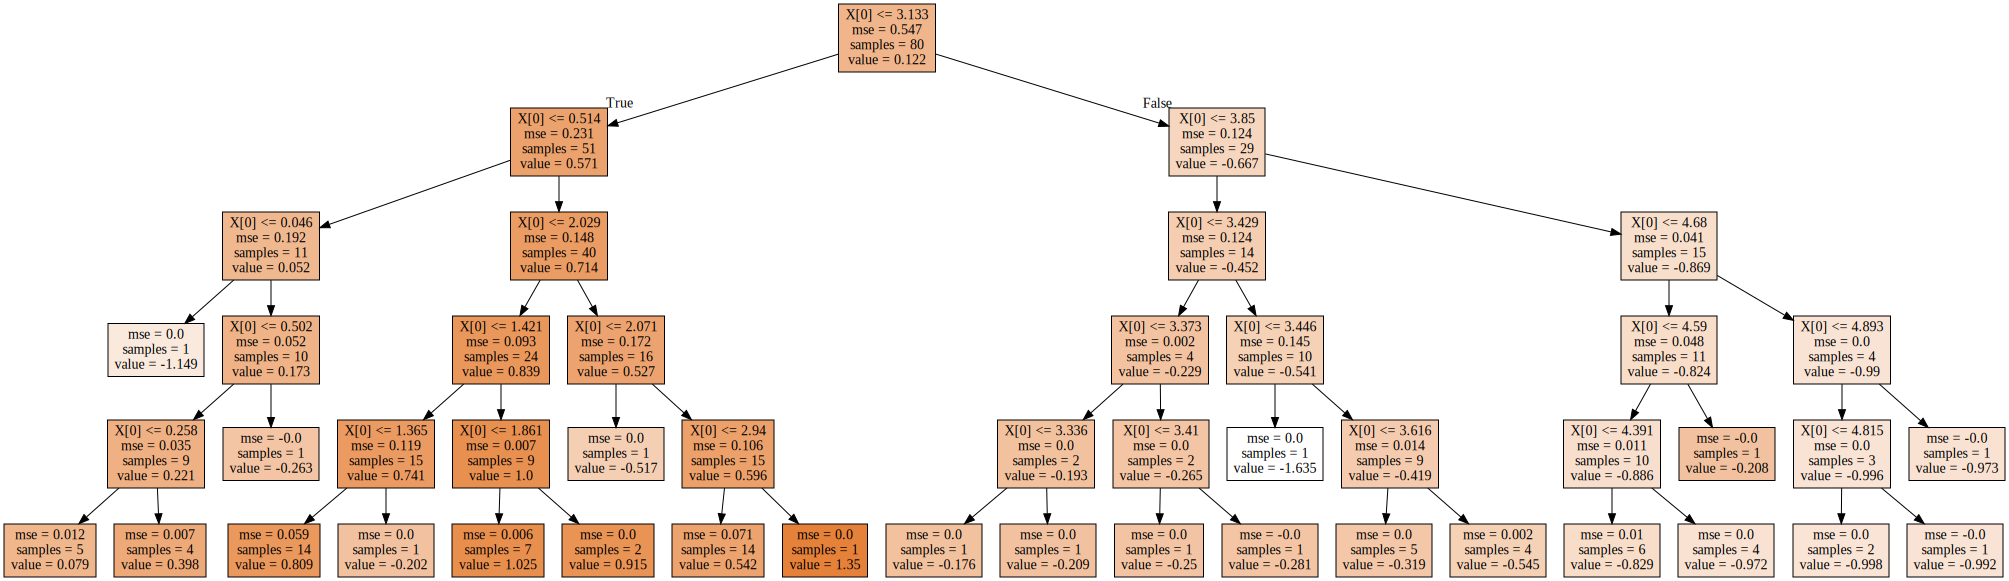

In [121]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

### With regularization

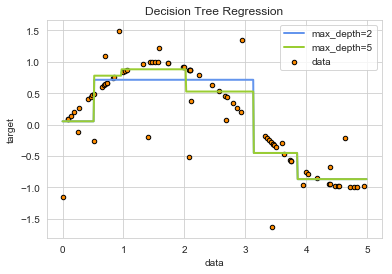

In [122]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Adding min_samples_leaf=10 made a max depth of 5 a lot better

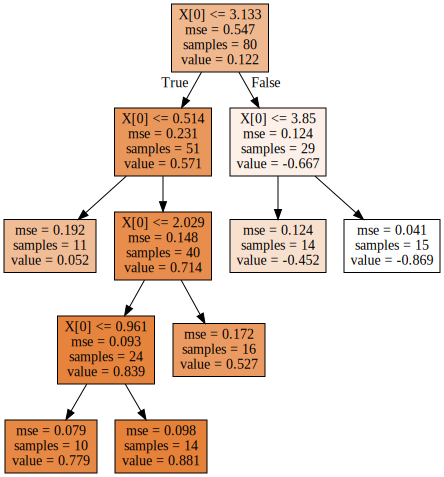

In [124]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

## Overfitting

In [125]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [126]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

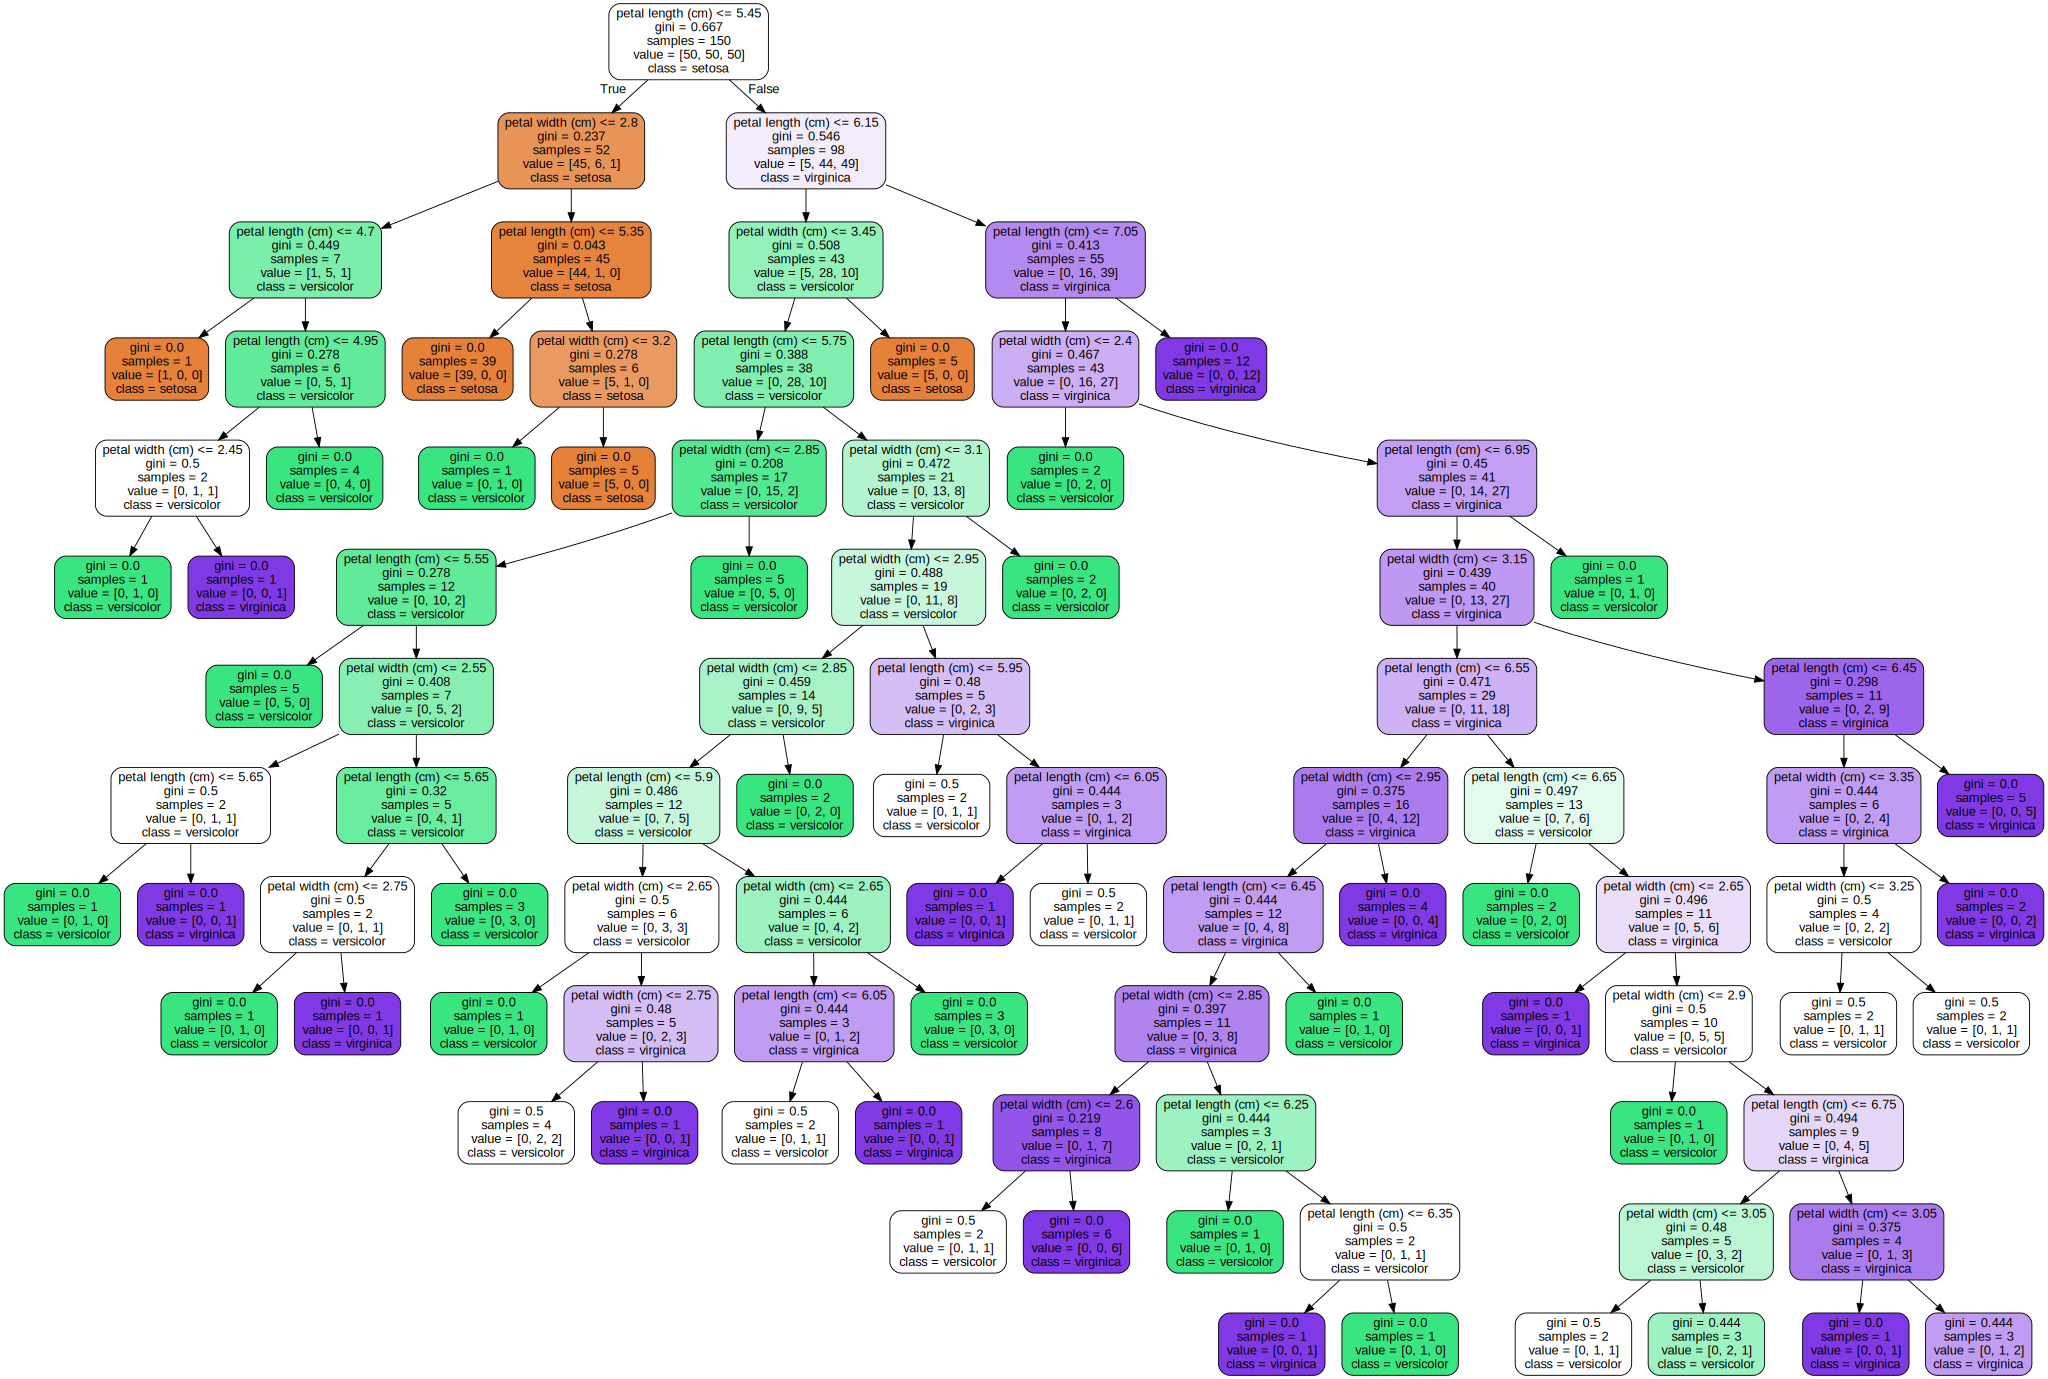

In [127]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

Clear case of overfitting

# Modelling End-to-End with Decision Trees

In [128]:
from sklearn.datasets import make_moons

In [130]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

In [131]:
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test =  train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
params = {'max_leaf_nodes': list(range(2,50)),
          'min_samples_split': [2, 3, 4]}

In [136]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [137]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [138]:
from sklearn.metrics import accuracy_score

In [140]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.82

Benchmark against the cl1 and cl2

In [141]:
cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [143]:
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

Interesting, grid search did worse than our cl2. Would need to expand the grid search to span more parameters/more values per parameter. Didn't test min_samples_leaf at all.

## Where to go from here

#### Tips on practical use:
 - Decision trees tend to overfit on data with large numbers of features. Check ratio of samples to number of features.
 - Consider performing dimensionality reduction (PCA, ICA, or Feeature Selection) beforehand.
 - Visualize your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth.
 - Use max_depth to control the size of the tree to prevent overfitting.
 - Tune min_samples_split or min_samples_leaf to control the number of samples at a leaf node.
 - Balance your dataset before training to prevent the tree from being biased towards the classes that are dominant.
 
 
     - By sampling an equal number of samples from each class.
     - By normalizing the sum of the sample weights (sample_weight) for each class to the same value/